In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [5]:
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [6]:
xs

tensor([ 0,  5, 13, 13,  1])

In [7]:
ys

tensor([ 5, 13, 13,  1,  0])

In [8]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
xenc.shape

torch.Size([5, 27])

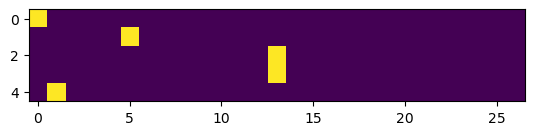

In [10]:
plt.imshow(xenc)

In [11]:
xenc.dtype

torch.float32

In [12]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 0.7705,  1.7746, -0.5880, -1.1258,  1.5898,  1.9118,  0.6364,  0.5766,
         -0.9974, -0.2869, -0.9528, -1.2419, -0.3427, -0.2150,  1.4217, -1.9592,
         -0.6971, -0.6006, -0.3988,  1.0183,  1.0197, -2.1205, -0.8522,  0.4002,
         -2.7285, -0.3351,  1.5705],
        [ 0.1099,  0.5492, -0.0782, -0.1606, -0.1340, -0.6621,  0.5519, -1.4361,
          0.1905, -0.9993, -2.0635,  0.4439,  0.0322, -0.2025,  1.3168, -1.4344,
         -0.9089,  0.3389,  0.6443,  1.3405, -0.3875,  0.2567, -0.9844,  0.1129,
         -0.1315, -0.7200,  0.7289],
        [-0.4975,  0.5845,  0.1667,  1.2808,  0.7090, -0.9272,  0.4006, -0.3979,
         -0.6262, -0.4729, -0.6175, -0.0334,  0.3470, -0.3121, -0.8718, -0.3047,
          0.5358,  0.2500,  1.3492, -0.6529,  0.1739, -0.6980,  0.3226,  0.1019,
          0.7784, -0.0533, -1.1418],
        [-0.4975,  0.5845,  0.1667,  1.2808,  0.7090, -0.9272,  0.4006, -0.3979,
         -0.6262, -0.4729, -0.6175, -0.0334,  0.3470, -0.3121, -0.8718, -0.3047

In [13]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0462, 0.1261, 0.0119, 0.0069, 0.1049, 0.1447, 0.0404, 0.0381, 0.0079,
         0.0161, 0.0082, 0.0062, 0.0152, 0.0172, 0.0886, 0.0030, 0.0107, 0.0117,
         0.0144, 0.0592, 0.0593, 0.0026, 0.0091, 0.0319, 0.0014, 0.0153, 0.1028],
        [0.0354, 0.0550, 0.0294, 0.0270, 0.0278, 0.0164, 0.0551, 0.0075, 0.0384,
         0.0117, 0.0040, 0.0495, 0.0328, 0.0259, 0.1184, 0.0076, 0.0128, 0.0445,
         0.0605, 0.1213, 0.0215, 0.0410, 0.0119, 0.0355, 0.0278, 0.0154, 0.0658],
        [0.0186, 0.0548, 0.0361, 0.1100, 0.0621, 0.0121, 0.0456, 0.0205, 0.0163,
         0.0190, 0.0165, 0.0295, 0.0432, 0.0224, 0.0128, 0.0225, 0.0522, 0.0392,
         0.1178, 0.0159, 0.0364, 0.0152, 0.0422, 0.0338, 0.0665, 0.0290, 0.0098],
        [0.0186, 0.0548, 0.0361, 0.1100, 0.0621, 0.0121, 0.0456, 0.0205, 0.0163,
         0.0190, 0.0165, 0.0295, 0.0432, 0.0224, 0.0128, 0.0225, 0.0522, 0.0392,
         0.1178, 0.0159, 0.0364, 0.0152, 0.0422, 0.0338, 0.0665, 0.0290, 0.0098],
        [0.0387, 0.0522,

In [14]:
probs.shape

torch.Size([5, 27])